# TP2

### Question 4

In [31]:
from qiskit import *
import qiskit.visualization as viz
import qiskit.quantum_info as quantum_info
import numpy as np
import json

In [32]:
def run(circuit):
    simulator = Aer.get_backend('statevector_simulator')
    job = execute(circuit, simulator, shots=1024)

    # Get the results
    result = job.result()
    return result

##### Le script suivant vise à faire l'expérience du phénomène de téléportation quantique.

On veut transférer l'état d'un qbit (Alice) dans un autre qbit (Bob) du circuit.

In [33]:
# Etat initial du qbit d'Alice décidé aléatoirement
init_state = quantum_info.random_statevector(2)

Construction d'un circuit pour le transfert du qbit 0 (qui représente Alice), vers le qbit 2 (qui représente Bob)

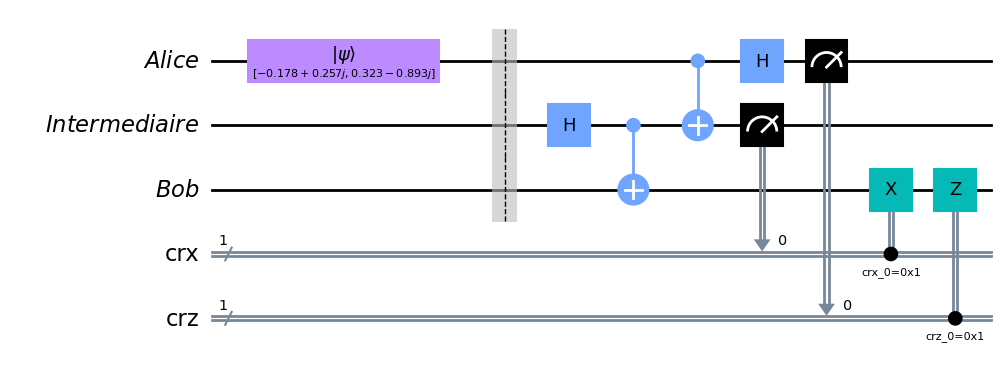

In [34]:
alice_qbit = QuantumRegister(1, name="Alice")
mid_qbit = QuantumRegister(1, name="Intermediaire")
bob_qbit = QuantumRegister(1, name="Bob")
crz = ClassicalRegister(1, name="crz")
crx = ClassicalRegister(1, name="crx")
circ = QuantumCircuit(alice_qbit, mid_qbit, bob_qbit, crx, crz)

circ.initialize(init_state, 0)
circ.barrier()
circ.h(1)
circ.cnot(1, 2) # q1 et q2 sont soit 11 soit 00
circ.cnot(0, 1) # q0 est à 0 donc q1 et q2 sont toujours 11 ou 00
circ.h(0)
circ.measure(1, 0) 
circ.measure(0, 1)
circ.x(2).c_if(crx[0], 1)
circ.z(2).c_if(crz[0], 1)

circ.draw('mpl')

Visualisation de l'état initial du qbit Alice sur la sphère de Bloch.

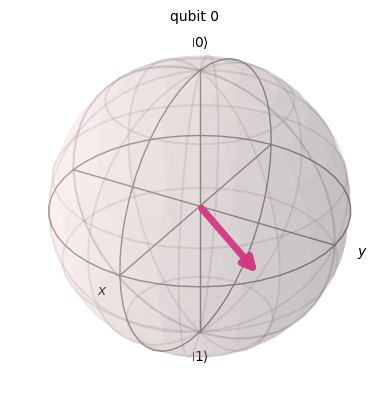

In [35]:
viz.plot_bloch_multivector(init_state)

Visualisation de l'état des 3 qbits en sortie du circuit.

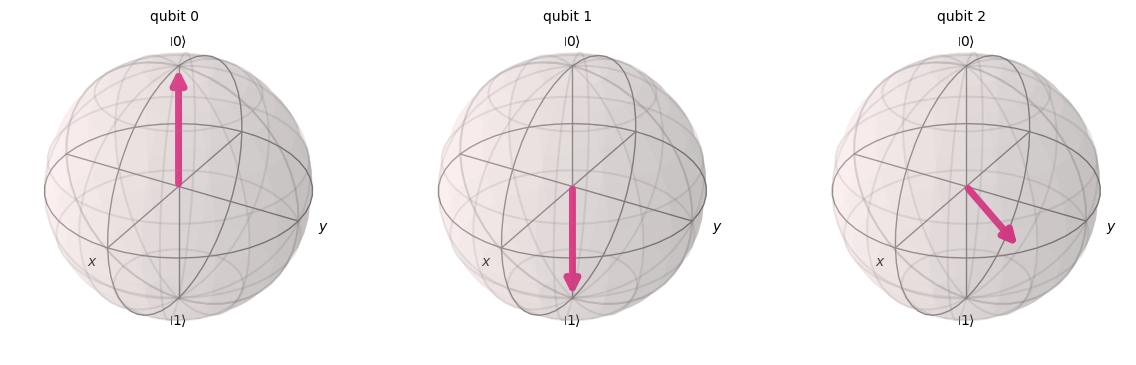

In [36]:
result = run(circ)
state = result.get_statevector()
viz.plot_bloch_multivector(state)

L'état des qbits en sortie du circuit est représenté sur la figure ci dessus.
Le qbit 2 (Bob) contient bien l'état initial d'Alice, renseigné initialement sur le qbit 0.

Les qbit q0 et q1 ont un état fixé par l'acte de mesure, |0> et |1> respectivement.
Ces deux qbits ont servi au transfert de l'état d'Alice pendant l'exploitation du circuit.

{'0 1': 227, '0 0': 273, '1 1': 278, '1 0': 246}


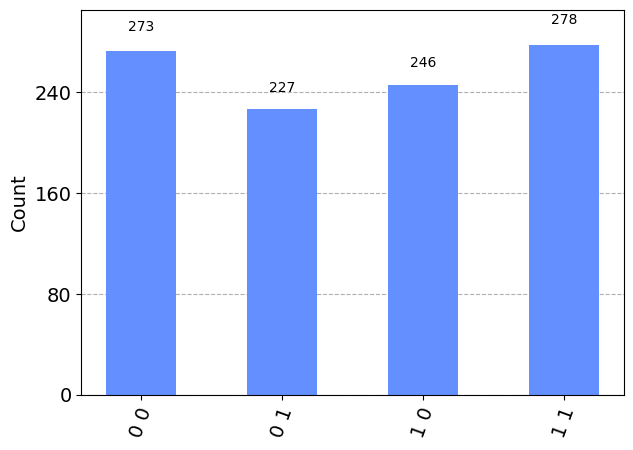

In [37]:
counts = result.get_counts(circ)
print(counts)
# visualisation des valeurs des qbits 0 et 1 après mesure
viz.plot_histogram(counts) # la repartition est aléatoire autours de l'équiprobabilité (ce qui était attendu)